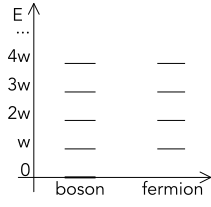

In [2]:
import matplotlib.pyplot as plt
from pylab import cm
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2


import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy.random import randn
import mpl_toolkits.axisartist as axisartist
import matplotlib as mpl

fig = plt.figure(figsize=(3, 3))
#使用axisartist.Subplot方法创建一个绘图区对象ax
ax = axisartist.Subplot(fig, 111) 
#将绘图区对象添加到画布中
fig.add_axes(ax)

#通过set_visible方法设置绘图区所有坐标轴隐藏
ax.axis[:].set_visible(False)

#ax.new_floating_axis代表添加新的坐标轴
ax.axis["x"] = ax.new_floating_axis(0,0.0)
#给x坐标轴加上箭头
ax.axis["x"].set_axisline_style("->", size = 1.5)
#添加y坐标轴，且加上箭头


ax.axis["y"] = ax.new_floating_axis(1,0.0)
ax.axis["y"].set_axisline_style("->", size = 1.5)
#设置x、y轴上刻度显示方向

ax.axis["x"].set_axis_direction("bottom")
ax.axis["y"].set_axis_direction("left")

#ax.set(xlabel='', ylabel='E')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#ax.xaxis.set_tick_params(which='major', size=0, width=2, direction='in')
#ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))

#ax.set_yticklabels([ '0','w', '2w','3w','4w','...'])  # vertically oriented colorbar
#ax.set_xticklabels(['','boson','', 'fermion'])  # vertically oriented colorbar


'''ax.tick_params(which='major', width=1.00)
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', width=0.75)
ax.tick_params(which='minor', length=2.5)
'''
ax.set_xlim(-0.5, 4.9)
ax.set_ylim(-0.5, 5)
#ax.tick_params(which='major', width=0.00)
ax.xaxis.set_tick_params(which='major', size=10, width=0)
                         
#ax.set_ylim(0, 1)
#ax.patch.set_alpha(0.0)
for i in range(5):
    if i==0:
        lw=2
    else:
        lw=1   
        ax.hlines(i, xmin=4, xmax=5,color='black',ls='-',lw=lw)
       
    ax.hlines(i, xmin=1, xmax=2,color='black',ls='-',lw=lw)
    
ax.text(-0.7,5.5,'E')
plt.yticks(np.arange(6)+0.2,[ '0','w', '2w','3w','4w','...'])   
plt.xticks([1.5,4.5],['boson', 'fermion'])   
#ax.set_xlim(0,50)
#plt.show()
plt.savefig('boson_fermion.png',dpi=400)


In [ ]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr#
from scipy import stats 

import matplotlib.pyplot as plt
from pylab import cm
import matplotlib as mpl

from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

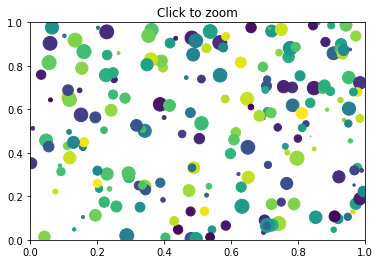

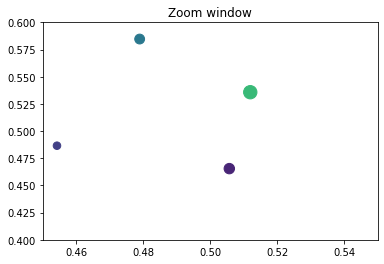

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)

figsrc, axsrc = plt.subplots()
figzoom, axzoom = plt.subplots()
axsrc.set(xlim=(0, 1), ylim=(0, 1), autoscale_on=False,
          title='Click to zoom')
axzoom.set(xlim=(0.45, 0.55), ylim=(0.4, 0.6), autoscale_on=False,
           title='Zoom window')

x, y, s, c = np.random.rand(4, 200)
s *= 200

axsrc.scatter(x, y, s, c)
axzoom.scatter(x, y, s, c)


def on_press(event):
    if event.button != 1:
        return
    x, y = event.xdata, event.ydata
    axzoom.set_xlim(x - 0.1, x + 0.1)
    axzoom.set_ylim(y - 0.1, y + 0.1)
    figzoom.canvas.draw()

figsrc.canvas.mpl_connect('button_press_event', on_press)
plt.show()

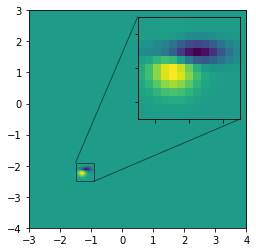

In [3]:
from matplotlib import cbook
import matplotlib.pyplot as plt
import numpy as np


def get_demo_image():
    z = cbook.get_sample_data("axes_grid/bivariate_normal.npy", np_load=True)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

fig, ax = plt.subplots(figsize=[5, 4])

# make data
Z, extent = get_demo_image()
Z2 = np.zeros((150, 150))
ny, nx = Z.shape
Z2[30:30+ny, 30:30+nx] = Z

ax.imshow(Z2, extent=extent, origin="lower")

# inset axes....
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.imshow(Z2, extent=extent, origin="lower")
# sub region of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()

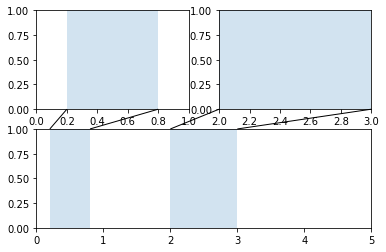

In [4]:
import matplotlib.pyplot as plt

from matplotlib.transforms import (
    Bbox, TransformedBbox, blended_transform_factory)
from mpl_toolkits.axes_grid1.inset_locator import (
    BboxPatch, BboxConnector, BboxConnectorPatch)


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = {
            **prop_lines,
            "alpha": prop_lines.get("alpha", 1) * 0.2,
            "clip_on": False,
        }

    c1 = BboxConnector(
        bbox1, bbox2, loc1=loc1a, loc2=loc2a, clip_on=False, **prop_lines)
    c2 = BboxConnector(
        bbox1, bbox2, loc1=loc1b, loc2=loc2b, clip_on=False, **prop_lines)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           # loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           clip_on=False,
                           **prop_patches)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    Connect *ax1* and *ax2*. The *xmin*-to-*xmax* range in both axes will
    be marked.

    Parameters
    ----------
    ax1
        The main axes.
    ax2
        The zoomed axes.
    xmin, xmax
        The limits of the colored area in both plot axes.
    **kwargs
        Arguments passed to the patch constructor.
    """

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, ax1.get_xaxis_transform())
    mybbox2 = TransformedBbox(bbox, ax2.get_xaxis_transform())

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect02(ax1, ax2, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes

    Similar to zoom_effect01.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


axs = plt.figure().subplot_mosaic([
    ["zoom1", "zoom2"],
    ["main", "main"],
])

axs["main"].set(xlim=(0, 5))
zoom_effect01(axs["zoom1"], axs["main"], 0.2, 0.8)
axs["zoom2"].set(xlim=(2, 3))
zoom_effect02(axs["zoom2"], axs["main"])

plt.show()

In [4]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

#import pyfits




#from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'




## 刻度网格

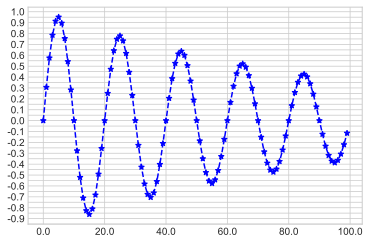

In [5]:
xmajorLocator   = MultipleLocator(20) #将x主刻度标签设置为10的倍数
xmajorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式
xminorLocator   = MultipleLocator(1) #将x轴次刻度标签设置为1的倍数
 
ymajorLocator   = MultipleLocator(0.1) #将y轴主刻度标签设置为10的倍数
ymajorFormatter = FormatStrFormatter('%2.1f') #设置y轴标签文本的格式
yminorLocator   = MultipleLocator(0.05) #将此y轴次刻度标签设置为1的倍数
 
t = np.arange(0.0, 100.0, 1)
s = np.sin(0.1*pi*t)*exp(-t*0.01)
 
ax = plt.subplot(111) #注意:一般都在ax中设置,不再plot中设置
plt.plot(t,s,'--b*')
 
#设置主刻度标签的位置,标签文本的格式
ax.xaxis.set_major_locator(xmajorLocator)
ax.xaxis.set_major_formatter(xmajorFormatter)
 
ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_major_formatter(ymajorFormatter)
 
#显示次刻度标签的位置,没有标签文本
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
 
ax.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
#ax.xaxis.grid(True, which='minor') 
ax.yaxis.grid(True, which='minor') #y坐标轴的网格使用次刻度
 
show()


## 刻度

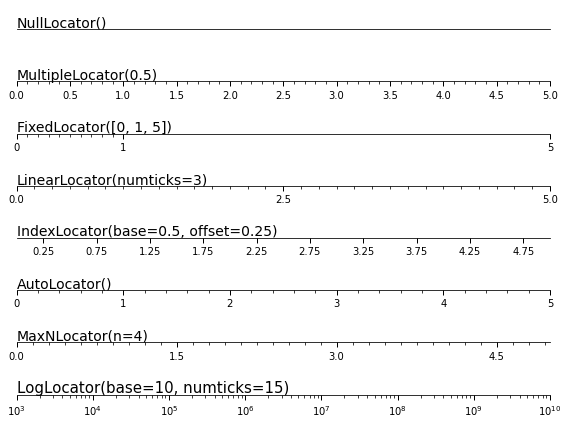

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


plt.figure(figsize=(8, 6))
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14,
        transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0, 1, 5])", fontsize=14,
        transform=ax.transAxes)

# Linear Locator
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(0.0, 0.1, "LinearLocator(numticks=3)",
        fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(0, 5), [0]*5, color='White')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(0.0, 0.1, "IndexLocator(base=0.5, offset=0.25)",
        fontsize=14, transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.tight_layout()
plt.show()

In [ ]:
问大家一个关于zoom in plot的问题。是这样的：

In [ ]:

ax = plt.subplot(projection=WCS(new_header), label='overlays')
axins = zoomed_inset_axes(ax, 2, loc="center", bbox_to_anchor=(0,0))
axins.imshow(optical_fluxmap, vmin=0.0, vmax=3000.0, origin='lower')
axins.scatter(ra_target * u.deg, dec_target * u.deg, color='r',
           s=100, marker='H', transform=axins.get_transform('fk5'))
axins.contour(xx_part,yy_part,image_part,colors='c',linewidths=1.5,levels=[39.3])
r25 = SphericalCircle((ra_target * u.deg, dec_target * u.deg), r1 * u.degree,
                      edgecolor='r', facecolor='none', ls='--',
                      transform=axins.get_transform('fk5'))
axins.add_patch(r25)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim([idx2-100,idx2])
axins.set_ylim([idx1,idx1+100])